# Tables of Content:

1. Introduction
    - Info's about datasets
2. Librarys
    - Importing library
    - Importing dataset
3. Knowing the data
    - Type of Data
    - Remove Missing Value
    - Description Data (Numeric)
    - Description Data (Categoric)
4. Exploring Some Variables
    - 4.1 Risk
    - 4.2 Age
    - 4.3 Sex
    - 4.4 Job
    - 4.5 Housing
    - 4.6 Saving Accounts
    - 4.7 Checking Account
    - 4.8 Credit Amount
    - 4.9 Duration
    - 4.10 Purpose
5. ccc
6. ddd

## 1. Introduction

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

Variables used in this dataset:
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

## 2. Librarys

In [62]:
#Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools as tls
import plotly.figure_factory as ff

In [2]:
#Importing dataset
data = pd.read_csv("C:/Users/ASUS/Downloads/PROJECT/CREDIT RISK/german_credit_data (1).csv", index_col=0)
data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


## 3. Data

In [3]:
#Type of data
data.info()

##Check missing value
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
#Remove missing values
##mengisi data yang missing dengan modus (nilai yang sering keluar) krn data berkategori obj/string
data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode()[0])
data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode()[0])

##Check again
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [7]:
#Description data (numeric)
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
#Object/string
data.describe(include = 'object')

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,1000,1000,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,786,668,337,700


## Summary:

- The average age of customers is 35.55
- The average credit amount is 3271
- The average credit duration is around 21 months (±2 years).
- There are more male borrowers than female borrowers.
- Most customers own their own homes.
- Most customers have savings and small account balances.
- Car loans dominate.

## 4. Exploring Some Variabels

In [78]:
data_good = data[data["Risk"] == 'good']
data_bad = data[data["Risk"] == 'bad']

#Colour
blue = dict(color='rgba(100, 149, 237, 0.6)',)
pink = dict(color='rgba(255, 182, 193, 0.6)',)
purple = dict(color='rgba(186, 85, 211, 0.6)',)
   

## 4.1 Risk

In [59]:
trace0 = go.Bar(
            x = data_good["Risk"].value_counts().index.values,
            y = data_good[data["Risk"]== 'good']["Risk"].value_counts().values,
            name = "Good credit",
            marker = blue
)

trace1 = go.Bar(
            x = data_bad["Risk"].value_counts().index.values,
            y = data_bad["Risk"].value_counts().values,
            name = "Bad credit",
            marker = pink
)

data_risk = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Risk Category'),
    title='Distribution of Risk'
)

fig = go.Figure(data=data_risk, layout=layout)

py.iplot(fig, filename='Risk_Grouped')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15504\1606808181.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Summary:

## 4.2 Age

In [60]:
#The average age of each credit category
data.groupby("Risk")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
bad,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0
good,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0


In [72]:
#Age distribution based on credit category
fig = px.histogram(
    data,
    x="Age",
    color="Risk",
    nbins=30,
    barmode='overlay',
    color_discrete_map={'good': 'rgba(100, 149, 237, 0.6)', 'bad': 'rgba(255, 182, 193, 0.6)'},
    title="Age Distribution Based on Credit Category"
)

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Frequency",
)

fig.show()

In [74]:
#Age distribution
data_good = data.loc[data["Risk"] == 'good']['Age'].values.tolist()
data_bad = data.loc[data["Risk"] == 'bad']['Age'].values.tolist()
data_age = data['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=data_good,
    histnorm='probability',
    name="Good credit",
    marker = blue
)
#Second plot
trace1 = go.Histogram(
    x=data_bad,
    histnorm='probability',
    name="Bad Credit",
    marker = pink
)
#Third plot
trace2 = go.Histogram(
    x=data_age,
    histnorm='probability',
    name="Overall Age",
    marker = purple
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='Age_Grouped')

In [75]:
#Age group
conditions = [
    (data['Age']>18) & (data['Age']<=29),
    (data['Age']>29) & (data['Age']<=40),
    (data['Age']>40) & (data['Age']<=55),
    (data['Age']>55)
]
choices = ['Young', 'Young Adults', 'Senior', 'Elder']
data['Age_group'] = np.select(conditions, choices,  default = 'Unknown')

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group,Age_group
0,67,male,2,own,little,little,1169,6,radio/TV,good,Elder,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,Young
2,49,male,1,own,little,little,2096,12,education,good,Senior,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior,Senior


In [85]:
#Credit amount by age group
trace0 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Age_group"],
    name='Good credit',
    marker=blue
)

trace1 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Age_group'],
    name='Bad credit',
    marker=pink
)
    
data_age_group = [trace0, trace1]

layout = go.Layout(
    title='Credit Amount by Age Group',
    yaxis=dict(title='Credit Amount', zeroline=False),
    xaxis=dict(title='Age Group Category'),
    boxmode='group'
)
fig = go.Figure(data=data_age_group, layout=layout)

py.iplot(fig, filename='Grouped_Age_Group')

## Summary:

## 4.3 Sex

In [88]:
#First plot 1
trace0 = go.Bar(
    x = data_good["Sex"].value_counts().index.values,
    y = data_good["Sex"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Sex"].value_counts().index.values,
    y = data_bad["Sex"].value_counts().values,
    name="Bad credit",
    marker=pink
)

#Second plot 1
trace2 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Sex"],
    name='Good credit',
    marker=blue
)

#Second plot 2
trace3 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Sex'],
    name='Bad credit',
    marker=pink
)
    
data_sex = [trace0, trace1, trace2, trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='Grouped_Sex')

C:\Users\ASUS\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Summary:

## 4.4 Job

In [89]:
#First plot 1
trace0 = go.Bar(
    x = data_good["Job"].value_counts().index.values,
    y = data_good["Job"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Job"].value_counts().index.values,
    y = data_bad["Job"].value_counts().values,
    name="Bad credit",
    marker=pink
)

#Second plot 1
trace2 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Job"],
    name='Good credit',
    marker=blue
)

#Second plot 2
trace3 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Job'],
    name='Bad credit',
    marker=pink
)

data_job = [trace0, trace1, trace2, trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Job Count', 'Credit Amount by Job'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Job Distribuition', boxmode='group')
py.iplot(fig, filename='Grouped_Job')

C:\Users\ASUS\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Summary:

## 4.5 Housing

In [90]:
#First plot 1
trace0 = go.Bar(
    x = data_good["Housing"].value_counts().index.values,
    y = data_good["Housing"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Housing"].value_counts().index.values,
    y = data_bad["Housing"].value_counts().values,
    name="Bad credit",
    marker=pink
)

#Second plot 1
trace2 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Housing"],
    name='Good credit',
    marker=blue
)

#Second plot 2
trace3 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Housing'],
    name='Bad credit',
    marker=pink
)

data_housing = [trace0, trace1, trace2, trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Housing Count', 'Credit Amount by Housing'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Housing Distribuition', boxmode='group')
py.iplot(fig, filename='Grouped_Housing')

C:\Users\ASUS\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Summary:

## 4.6 Saving Accounts

In [91]:
#First plot 1
trace0 = go.Bar(
    x = data_good["Saving accounts"].value_counts().index.values,
    y = data_good["Saving accounts"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Saving accounts"].value_counts().index.values,
    y = data_bad["Saving accounts"].value_counts().values,
    name="Bad credit",
    marker=pink
)

#Second plot 1
trace2 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Saving accounts"],
    name='Good credit',
    marker=blue
)

#Second plot 2
trace3 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Saving accounts'],
    name='Bad credit',
    marker=pink
)

data_saving_accounts = [trace0, trace1, trace2, trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Saving Accounts Count', 'Credit Amount by Saving Accounts'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Saving Accounts Distribuition', boxmode='group')
py.iplot(fig, filename='Grouped_Saving_Account')

C:\Users\ASUS\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Summary:

## 4.7 Checking Account

In [93]:
#First plot 1
trace0 = go.Bar(
    x = data_good["Checking account"].value_counts().index.values,
    y = data_good["Checking account"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Checking account"].value_counts().index.values,
    y = data_bad["Checking account"].value_counts().values,
    name="Bad credit",
    marker=pink
)

#Second plot 1
trace2 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Checking account"],
    name='Good credit',
    marker=blue
)

#Second plot 2
trace3 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Checking account'],
    name='Bad credit',
    marker=pink
)
    
data_checking_account = [trace0, trace1, trace2, trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Checking Account Count', 'Credit Amount by Checking Account'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Checking Account Distribuition', boxmode='group')
py.iplot(fig, filename='Grouped_Checking_Account')

C:\Users\ASUS\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Summary:

## 4.8 Credit Amount

In [96]:
#Add histogram data
x1 = np.log(data_good['Credit amount']) 
x2 = np.log(data_bad["Credit amount"])

#Group data together
hist_data = [x1, x2]
group_labels = ['Good credit', 'Bad credit']

#Colours
colors = ['rgba(100, 149, 237, 0.6)',  
          'rgba(255, 182, 193, 0.6)']  

#Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors)

fig.update_layout(
    title='Distribution of Credit Amount',
    xaxis_title='Log(Credit Amount)',
    yaxis_title='Density',
)

#Plot!
py.iplot(fig, filename='Grouped_Credit_Amount')

## Summary:

## 4.9 Duration

In [98]:
#Distribution of durations
#First plot 1
trace0 = go.Bar(
    x = data_good["Duration"].value_counts().index.values,
    y = data_good["Duration"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Duration"].value_counts().index.values,
    y = data_bad["Duration"].value_counts().values,
    name="Bad credit",
    marker=pink
)

data_duration = [trace0, trace1]

layout = go.Layout(
    title='Distribuition of Duration'
)

fig = go.Figure(data=data_duration, layout=layout)

py.iplot(fig, filename='Grouped_Duration')

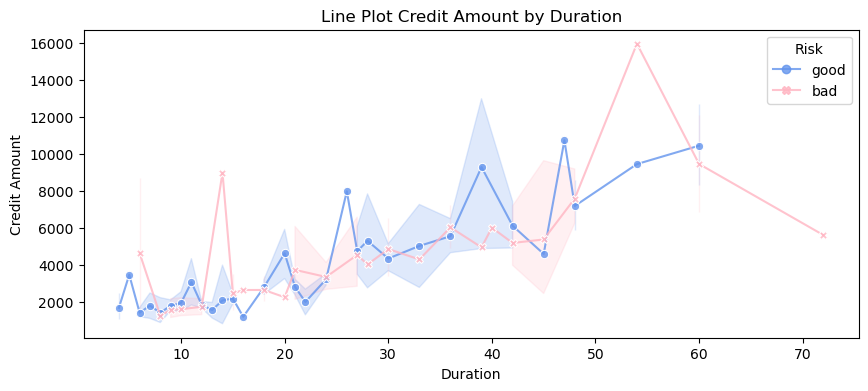

In [104]:
#Credit amount by duration
palette = {
    'good': (0.39, 0.58, 0.93, 0.8),  
    'bad': (1.0, 0.71, 0.76, 0.8)    
}

plt.figure(figsize=(10, 4))
sns.lineplot(
    data=data,
    x='Duration',
    y='Credit amount',
    hue='Risk',
    style='Risk',
    markers=True,
    dashes=False,
    palette=palette
)
plt.title('Line Plot Credit Amount by Duration')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.legend(title='Risk')
plt.show()

## Summary:

## 4.10 Purpose

In [105]:
#First plot 1
trace0 = go.Bar(
    x = data_good["Purpose"].value_counts().index.values,
    y = data_good["Purpose"].value_counts().values,
    name='Good credit',
    marker=blue
)

#First plot 2
trace1 = go.Bar(
    x = data_bad["Purpose"].value_counts().index.values,
    y = data_bad["Purpose"].value_counts().values,
    name="Bad credit",
    marker=pink
)

#Second plot 1
trace2 = go.Box(
    y=data_good["Credit amount"],
    x=data_good["Purpose"],
    name='Good credit',
    marker=blue
)

#Second plot 2
trace3 = go.Box(
    y=data_bad['Credit amount'],
    x=data_bad['Purpose'],
    name='Bad credit',
    marker=pink
)

data_purpose = [trace0, trace1, trace2, trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Purpose Count', 'Credit Amount by Purpose'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Purpose Distribuition', boxmode='group')
py.iplot(fig, filename='Grouped_Purpose')

C:\Users\ASUS\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Summary: